1. Apply LDA for dimensionality reduction and any classifier for face recognition on 
the ORL dataset and analyze the performance.

In [1]:
import os
import cv2
import numpy as np

In [2]:
data_dir = 'datasets/ORL dataset'
images = []
labels = []

In [3]:
for filename in os.listdir(data_dir):
    img = cv2.imread(os.path.join(data_dir, filename), cv2.IMREAD_GRAYSCALE)
    images.append(img.flatten())
    parts = filename.split('_')
    label = int(parts[1].split(".")[0])
    labels.append(label)

In [4]:
X = np.array(images)
y = np.array(labels)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
lda = LinearDiscriminantAnalysis(n_components=min(len(np.unique(y_train))-1, X_train.shape[1]))
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train_lda, y_train)

SVC(kernel='linear', random_state=42)

In [11]:
y_pred_svm = svm_clf.predict(X_test_lda)
acc_svm = accuracy_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

In [13]:
from sklearn.metrics import classification_report
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Classification report \n{classification_report(y_test, y_pred_svm)}")

Accuracy: 0.9512195121951219
Classification report 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       0.50      0.50      0.50         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00      

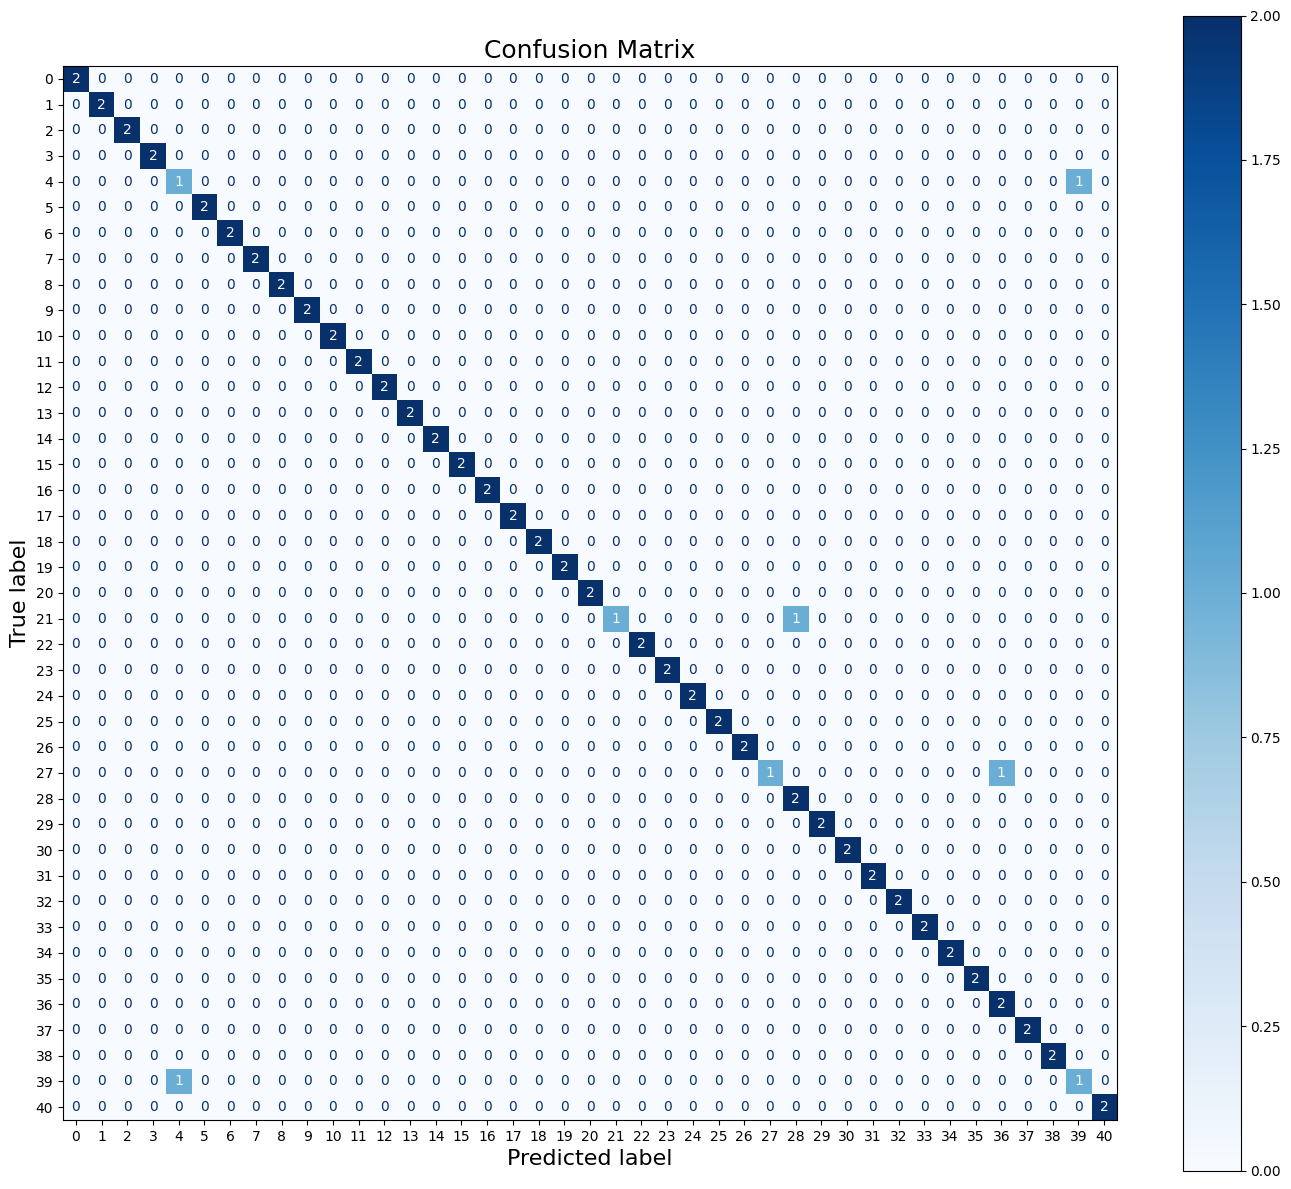

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

plt.figure(figsize=(17, 15)) 
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.xlabel('Predicted label', fontsize=16)
plt.ylabel('True label', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.show()